<div>
<b><font color="#0cb8ac" font size="3">
Description:
</font></b>
<i><font size="3">
In this notebook i will construct a model which could identify the given creature, whether it is a pokemon or a digimon.
</font></i>
</div>
<br>

<div>
<b><font size="2">
Enes Dilber,
</font></b>
<i>August 18, 2017</i>
<hr>

<h2>
<font color="#0cb8ac">
Part I : 
</font>
Data Preparation
</h2>

<i>Dependencies for data handling:</i>

In [1]:
from scipy.misc import imread, imresize
from scipy.io import loadmat
import numpy as np
from sklearn.model_selection import train_test_split
import os
import functools
import random

<i>Dependencies for modeling:</i>

In [2]:
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.utils import np_utils

from keras.optimizers import adagrad

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, History

import keras

Using TensorFlow backend.


<i>Creating the list of image names for each species:</i>

In [3]:
poke_dir = "/home/enes/Dropbox/project_mon2/poke_img/"
digi_dir = "/home/enes/Dropbox/project_mon2/digi_img/"

poke_list = os.listdir(poke_dir)
digi_list = os.listdir(digi_dir)

<b><font color="#0cb8ac" font size="3">
read_and_resize :
</b>
A function that reads and resize an image from the file. And returns the image.
</font>
<br>

<font color="#046131">
im_address = 
</font>
<i>address of the image as a string.</i>
<br>

<font color="#046131">
im_size = 
</font>
<i>desired size of the uploaded image.</i>
<br>

In [4]:
def read_and_resize(im_address, im_size):
    temp = imread(im_address)
    temp = imresize(temp, im_size)
    return temp

<i>Loading the creatures (721 <font color="#0cb8ac">pokemon</font> and 1173 <font color="#0cb8ac">digimon</font> ):</i>

In [5]:
#loading pokemon
X = []
for i in poke_list:
    curr_address = poke_dir + i
    X.append(read_and_resize(curr_address, [100,100]))

In [6]:
#loading digimon
for i in digi_list:
    curr_address = digi_dir + i
    X.append(read_and_resize(curr_address, [100,100]))

<i>Creating the response (Y=1 if the creature is <font color="#0cb8ac">pokemon</font>, Y=0 if it is <font color="#0cb8ac">digimon</font>):</i>

In [7]:
Y = np.zeros(len(poke_list) + len(digi_list) )
for i in range(len(poke_list)):
    Y[i] = 1
Y = Y.astype(int)

<i>Some digimon have 4 channes so i will reduce them to 3 channels, because we need all inputs to have same shape which is 100x100x3:</i>

In [8]:
temp=[]
for i in range(len(Y)):
    
    temp_logic=np.asarray(X[i]).shape[2]==4
    if(temp_logic): 
        X[i]= X[i][:,:,:3]
        
X = np.asanyarray(X)

<i>Split data for validation:</i>

In [9]:
test_size = 0.4

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, 
                                                    stratify=Y, random_state = 108)

<b><font color="#0cb8ac" font size="3">
show_images :
</b>
A function that shows the random sample of given image set. 
</font>
<br>

<font color="#046131">
Images = 
</font>
<i>A set of images in appropraite form.</i>
<br>

<font color="#046131">
labels = 
</font>
<i>Labels of the Images.</i>
<br>

<font color="#046131">
n = 
</font>
<i>Sample size of output images.</i>
<br>

In [31]:
#check images if everything is okay or not
def show_images(Images, labels, n):

    import matplotlib.pyplot as plt
    %matplotlib inline
    N = len(labels)
        
    Pop = np.arange(N)
    Samp = np.random.choice(Pop, n, replace=False)
     
    plt.figure(figsize=(20,8))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(Images[Samp[i]], interpolation='nearest')
        plt.text(0, 0, labels[Samp[i]], color='black', 
                 bbox=dict(facecolor='white', alpha=1))
        plt.axis('off')  

<i>Before modeling part lets check the images if everything is okay or not (Label is 1 if the creature is pokemon, 0 if digimon) :</i>

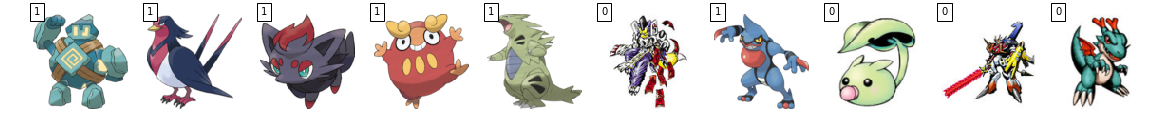

In [11]:
show_images(x_train, y_train, 10) #show train

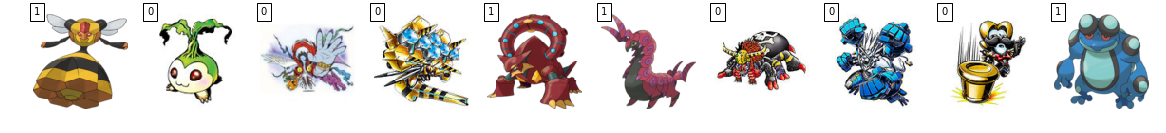

In [12]:
show_images(x_test, y_test, 10) #show test

<h2>
<font color="#0cb8ac">
Part II : 
</font>
Modeling
</h2>

<i>Dummy coding the output:</i>

In [13]:
num_classes=2
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

<i> Modeling function: ( It is directly copied from <a href="https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py" target="_blank">simple deep CNN on the CIFAR10 of François Chollet</a> )</i>:

In [14]:
def model_X():
    #modeling
    #modeling
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', strides = 2,
                     input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), strides = 2))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

   
    return(model)

In [22]:
model=model_X()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 64)        18496     
__________

<i> I used Data Augmentation:</i>

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

<i>And here is the training process. In addition to chollet's model, i used early stopping to stop model in a small number of epoch. Plus, with early stopping one can avoid overfitting.</i>

In [23]:
batch_size=16
temp=model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                         steps_per_epoch = x_train.shape[0] // batch_size,
                         epochs = 200, 
                         callbacks = [EarlyStopping(monitor='val_loss',  patience = 3)],
                         validation_data = (x_test, y_test))

Epoch 1/200
71/71 [==============================] - 10s - loss: 0.6342 - acc: 0.6180 - val_loss: 0.5586 - val_acc: 0.6293
Epoch 2/200
71/71 [==============================] - 9s - loss: 0.4896 - acc: 0.7430 - val_loss: 0.3519 - val_acc: 0.8338
Epoch 3/200
71/71 [==============================] - 9s - loss: 0.3681 - acc: 0.8407 - val_loss: 0.2767 - val_acc: 0.8945
Epoch 4/200
71/71 [==============================] - 9s - loss: 0.3323 - acc: 0.8671 - val_loss: 0.2474 - val_acc: 0.9037
Epoch 5/200
71/71 [==============================] - 9s - loss: 0.3053 - acc: 0.8794 - val_loss: 0.2269 - val_acc: 0.9169
Epoch 6/200
71/71 [==============================] - 9s - loss: 0.2904 - acc: 0.8952 - val_loss: 0.2114 - val_acc: 0.9208
Epoch 7/200
71/71 [==============================] - 9s - loss: 0.2748 - acc: 0.8952 - val_loss: 0.1969 - val_acc: 0.9195
Epoch 8/200
71/71 [==============================] - 9s - loss: 0.2525 - acc: 0.9023 - val_loss: 0.2180 - val_acc: 0.9011
Epoch 9/200
71/71 [====

<h2>
<font color="#0cb8ac">
Part III : 
</font>
Findings and Comments
</h2>

<i>Model has trained really fast. After 25 epoch its validation accuracy is around .95%, which is quite good. Because even a person who watches these shows could not correctly classify some of creatures. I could say it's a quite impressive result. Especially for a model that has trained so fast.</i>

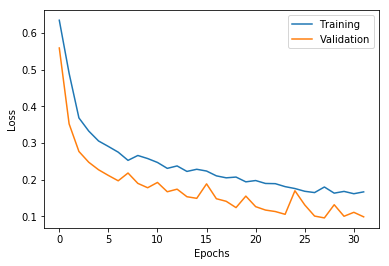

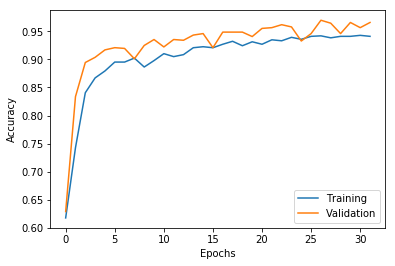

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

curr_loss=temp.history['loss']
curr_val_loss=temp.history['val_loss']
curr_acc=temp.history['acc']
curr_val_acc=temp.history['val_acc']   

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(curr_loss)
plt.plot(curr_val_loss)
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(curr_acc)
plt.plot(curr_val_acc)
plt.legend(['Training', 'Validation'], loc='lower right')

<i>Lastly, i will show the misclassified images.</i>

In [25]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)

In [26]:
y_test = y_test.argmax(axis=1)

In [27]:
misclassifieds = [i for i, x in enumerate(y_test == y_pred) if not x]
misclassifieds = np.asanyarray(misclassifieds)

In [28]:
labels = []
for i in range(len(y_test)):
    if(y_test[i] == 1):
        labels.append("pokemon")
    else:
        labels.append("digimon")
        
labels = np.asarray(labels)

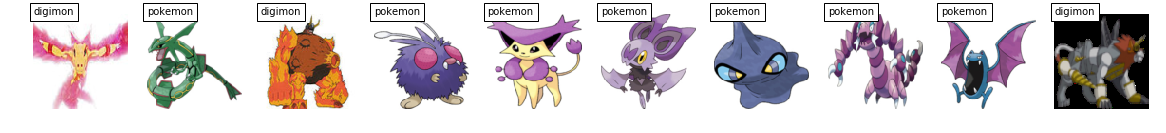

In [38]:
show_images(x_test[misclassifieds], labels[misclassifieds], 10) #show misclassifieds